In [1]:
import tensorflow as tf
tf.__version__

Init Plugin
Init Graph Optimizer
Init Kernel


'2.5.0'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [5]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [6]:
# the data is only 2D
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [7]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [8]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()

Metal device set to: Apple M1 Max


2022-04-25 19:43:27.483855: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-25 19:43:27.484091: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

2022-04-25 19:43:39.472163: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-25 19:43:39.475238: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-25 19:43:39.646898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/15
1868/1875 [============================>.] - ETA: 0s - loss: 0.5111 - accuracy: 0.8094

2022-04-25 19:43:52.585167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 14s 6ms/step - loss: 0.5105 - accuracy: 0.8096 - val_loss: 0.3931 - val_accuracy: 0.8503
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3506 - accuracy: 0.8691 - val_loss: 0.3525 - val_accuracy: 0.8711
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3011 - accuracy: 0.8861 - val_loss: 0.3385 - val_accuracy: 0.8752
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2669 - accuracy: 0.8990 - val_loss: 0.3170 - val_accuracy: 0.8810
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2451 - accuracy: 0.9071 - val_loss: 0.2917 - val_accuracy: 0.8952
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2211 - accuracy: 0.9161 - val_loss: 0.3099 - val_accuracy: 0.8893
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2013 - accuracy: 0.9232 - val_loss: 0.3037 - val_accuracy: 0.8

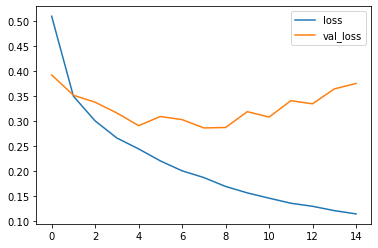

In [10]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

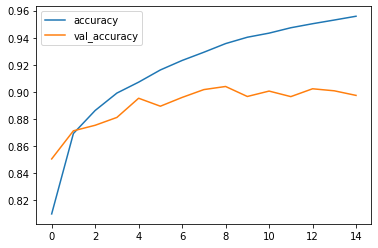

In [12]:
# Plot accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

2022-04-25 19:47:06.744659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Consusion matrix, without normalization
[[837   2  21  18   1   0 114   0   7   0]
 [  1 970   2  16   4   0   5   0   2   0]
 [ 19   0 840   8  57   0  76   0   0   0]
 [ 12   1  20 915  24   0  27   0   1   0]
 [  1   0  68  28 813   0  89   0   1   0]
 [  0   0   0   0   0 970   0  23   0   7]
 [ 83   0  63  24  82   0 737   1  10   0]
 [  0   0   0   0   0   7   0 985   0   8]
 [  3   0   9   3   4   1  14   3 963   0]
 [  1   0   0   0   0   5   0  50   1 943]]


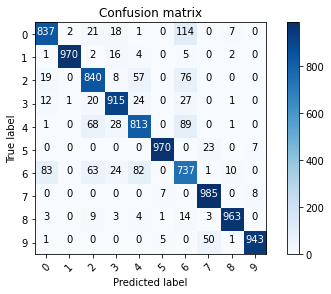

In [13]:
from sklearn.metrics import confusion_matrix
import itertools
def plt_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  '''
  This function prints and plots the confusion matrix.
  Normalization can be appled by setting `normalize=True`.
  '''
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('normalized confusion matrix')
  else:
    print('Consusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt_confusion_matrix(cm, list(range(10)))


In [14]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

Text(0.5, 1.0, 'True label: Dress, Predicted: Shirt')

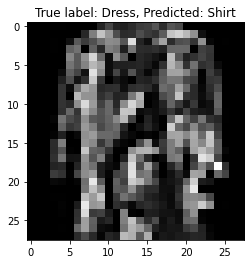

In [15]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s, Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))